# Capstone 3 - Customer Churn Prediction for Telco

In the previous [Notebook](https://github.com/dvanheeswijk/Springboard/blob/master/Capstone_3/Capstone%203%20-%20Data%20Wrangling.ipynb), we looked into the Telco customer churn data, cleaning and changing the data as necessary in order to prepare for our next phase. Here, we will now explore the data and look to find out as much as we can from the data. For this purpose, we will refer to our original data, found in *Telco_customer_churn.xlsx*, as well as our clean data, *clean_data.csv*.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [82]:
df_churn = pd.read_excel('data/Telco_customer_churn.xlsx')
df_clean = pd.read_csv('data/clean_data.csv')

### Exploring the Data

We will start our exploration using the previously uncleaned data, in order to see how the data looks with regards to the labels associated with each category.

In [83]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### Analysis of location and churn

In [84]:
df_city = df_churn.groupby('City')['Churn Value'].sum().sort_values(ascending=False).head(10)

df_city = pd.DataFrame(df_city, index=None)
df_city.reset_index(inplace=True)
df_city

,City,Churn Value
0,Los Angeles,90
1,San Diego,50
2,San Francisco,31
3,San Jose,29
4,Sacramento,26
5,Fresno,16
6,Long Beach,15
7,Glendale,13
8,Oakland,13
9,Modesto,12


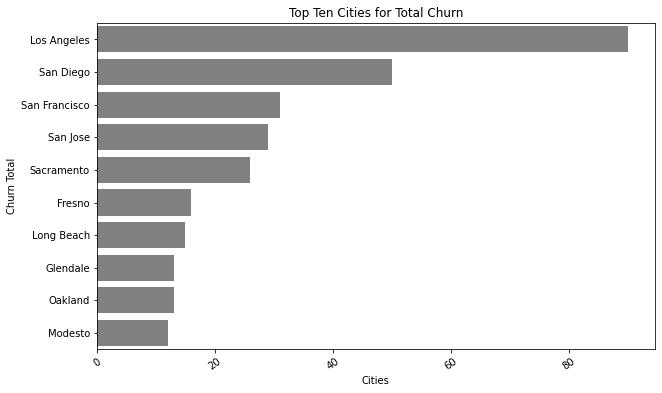

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(y='City', x='Churn Value', data=df_city, color='gray')
plt.xticks(rotation=35)
plt.title('Top Ten Cities for Total Churn')
plt.ylabel('Churn Total')
plt.xlabel('Cities')

plt.savefig('images/City_Churn_total.png')

It is clear that Los Angeles has a higher amount of churn compared to the other cities listed, with San Diego being roughly half as much churn, despite being the second highest. We don't know, however, what percentage of customers churn from each area, which may help us determine the areas that are most concerning.

In [86]:
df_city = df_churn.groupby("City")[['City', 'Churn Value']].agg({'City':'count', 'Churn Value':'sum'})
df_city.rename(columns={'City':'City Count'}, inplace=True)

In [87]:
df_city['Percentage Churn'] = df_city['Churn Value'] / df_city['City Count']

df_city[(df_city['Percentage Churn'] == 1.0) & (df_city['City Count']>0)]

,City Count,Churn Value,Percentage Churn
City,,,
Boulder Creek,4,4,1.0
Eldridge,4,4,1.0
Fort Jones,4,4,1.0
Johannesburg,4,4,1.0
Maricopa,4,4,1.0
Riverbank,4,4,1.0
Smith River,4,4,1.0
South Lake Tahoe,4,4,1.0
Tipton,4,4,1.0


We see several cities with only 4 customers all saw their entire set of customers churn. While this is worth looking into, we would also like to see what larger cities are churning at higher rates to get an idea of where to focus our questions for limiting customer churn.

In [88]:
df_city_churn = df_city[(df_city['City Count']>20)].sort_values('Percentage Churn', ascending=False).head(10)
df_city_churn.reset_index(inplace=True)

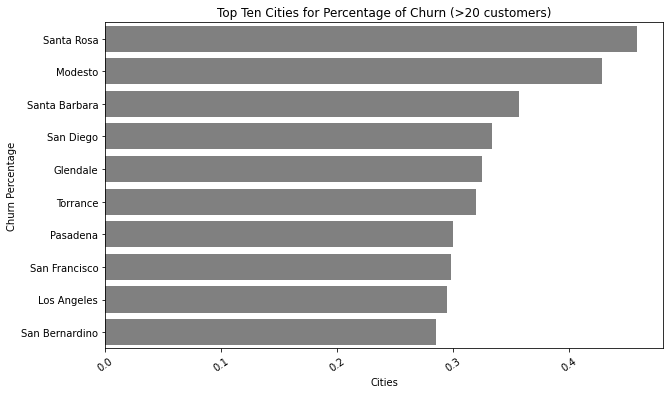

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(y='City', x='Percentage Churn', data=df_city_churn, color='gray')
plt.xticks(rotation=35)
plt.title('Top Ten Cities for Percentage of Churn (>20 customers)')
plt.ylabel('Churn Percentage')
plt.xlabel('Cities')

plt.savefig('images/Cities_Churn_perc.png')

Some observations from the two plots we have shown:

* This plot shows that cities such as Los Angeles, San Francisco, and San Diego all see around 30% churn of customers, while also having higher overall populations. 

* Santa Rosa and Modesto both have very high percentages of churn among customers, with Modesto coming in 10th of overall churn as well.

* We also see that San Jose does not appear in the top 10 for percentage of customer churn, but is 4th in overall churn.

#### Analysis of services vs churn

In [90]:
df_churn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
# services = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
#        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
#        'Streaming Movies']

# df_churn.groupby(services)